**Импорт библиотек**

In [69]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import umap.umap_ as umap
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

****Загрузка sparse matrix****

In [70]:
input_path = '/kaggle/input/ml-2025-spring-unsupervised/train.npz'
X_sparse = sp.load_npz(input_path)
print(f"Загружена sparse матрица формы {X_sparse.shape} и {X_sparse.nnz} ненулевыми элементами")
X = X_sparse.toarray()

Загружена sparse матрица формы (21000, 3049) и 11704521 ненулевыми элементами


**Стандартизация данных**

In [71]:
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_sparse)

**Уменьшение размерности с помощью Truncated SVD**

In [72]:
n_components = 9
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_reduced = svd.fit_transform(X_scaled)
explained = svd.explained_variance_ratio_.sum()
print(f"Размерность понижена до {n_components} компонент, с объясненной дисперсией: {explained:.2%}")
X_reduced.shape

Размерность понижена до 9 компонент, с объясненной дисперсией: 1.35%


(21000, 9)

**Визуализация данных**

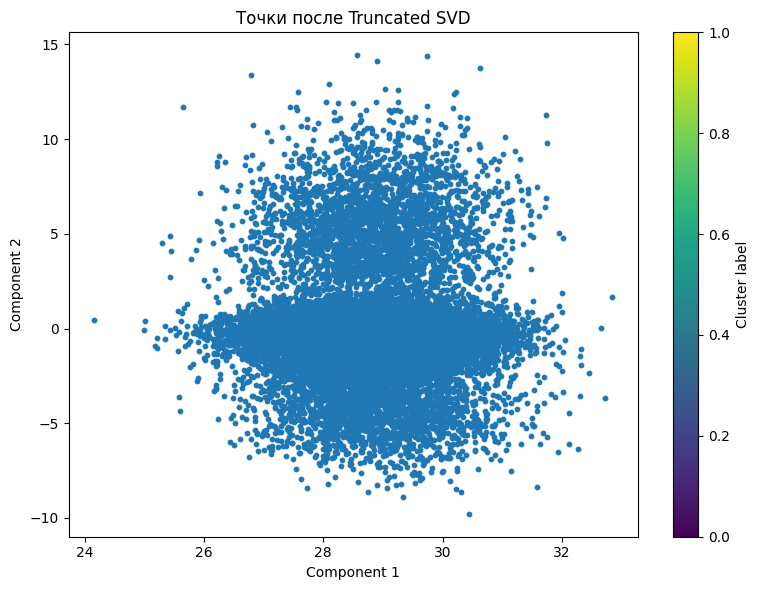

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=10)
plt.title('Точки после Truncated SVD')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster label')
plt.tight_layout()
plt.show()

**Уменьшение размерности с помощью UMAP**

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


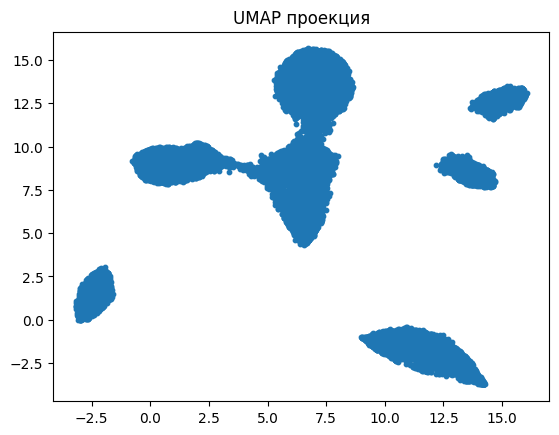

In [74]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_reduced)
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10)
plt.title("UMAP проекция")
plt.show()

**Кластеризация Gaussian Mixture (по графику явно выделяются 7 кластеров)**

In [77]:
gmm = GaussianMixture(n_components=7, covariance_type='tied', random_state=42, max_iter=500, n_init=5)
gmm.fit(X_umap)
labels = gmm.predict(X_umap)

**Визуализация кластеров**

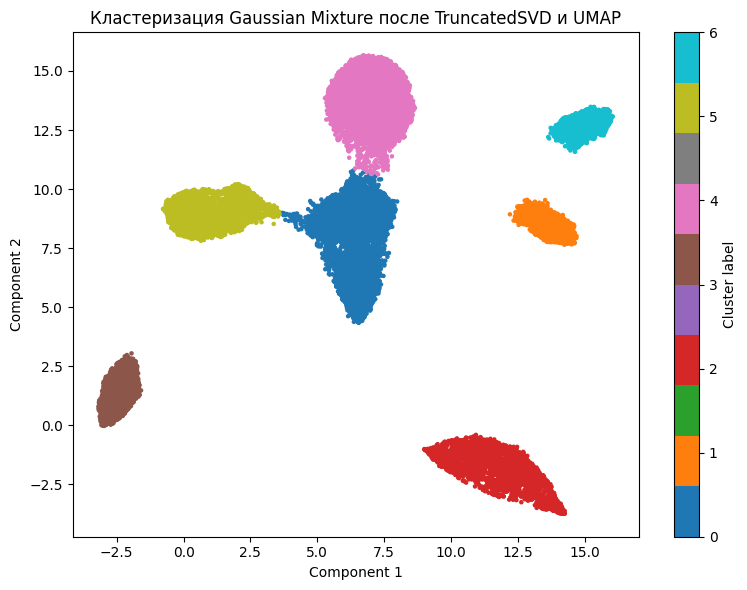

In [78]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=5)
plt.title('Кластеризация Gaussian Mixture после TruncatedSVD и UMAP')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster label')
plt.tight_layout()
plt.show()


**Silhouette score**

In [79]:
score = silhouette_score(X_umap, labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.7324


**Генерация csv файла**

In [80]:
ID = [i for i in range(21000)]
result_df = pd.DataFrame({'ID': ID,
                          'TARGET': labels})
result_df.to_csv('submission.csv', index=False)